<a href="https://colab.research.google.com/github/martinpius/Behind-Keras-Layers-and-Models/blob/main/Reloaded_Pandemonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using Colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n.....Please Load Your Drive....")

def timesetter(t):
  h = int(t/(60*60))
  m = int(t% (60*60)/60)
  s = int(t%60)
  return f"{h}:{m:>03}:{s:>05.3f}"


Mounted at /content/drive
You are using Colab with tensorflow version: 2.4.0


In [ ]:
timesetter(120.48923)

'0:002:0.000'

In [ ]:
#A simple CNN using functional API

In [ ]:
import tensorflow as tf

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 14, 14, 32)        320       
_________________________________________________________________
Conv2 (Conv2D)               (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 2, 2, 64)          0         
_________________________________________________________________
batchnorm1 (BatchNormalizati (None, 2, 2, 64)          256       
_________________________________________________________________
Conv3 (Conv2D)               (None, 1, 1, 32)          18464     
_________________________________________________________________
Conv4 (Conv2D)               (None, 1, 1, 64)          1849

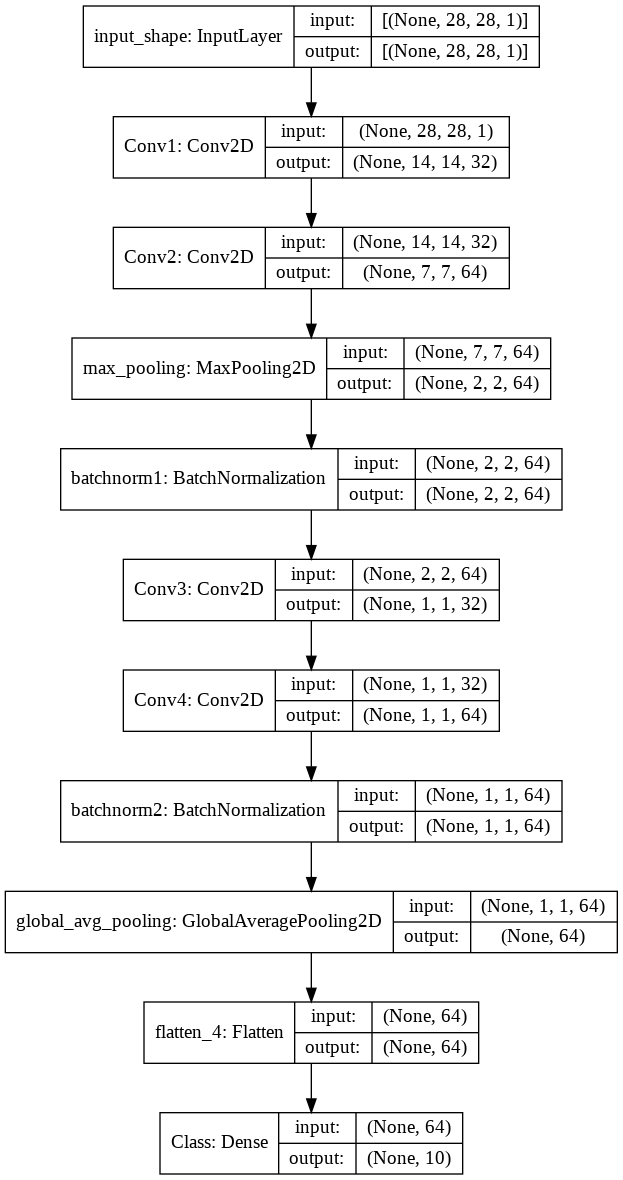

In [ ]:
inputs = tf.keras.Input(shape = (28,28,1), name = 'input_shape')
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2),padding = 'same',activation = 'relu', name ='Conv1')(inputs)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu', name = 'Conv2')(x)
x = tf.keras.layers.MaxPooling2D(pool_size= 3, name = 'max_pooling')(x)
x = tf.keras.layers.BatchNormalization(name = 'batchnorm1')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu',name = 'Conv3')(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu', name = 'Conv4')(x)
x = tf.keras.layers.BatchNormalization(name = 'batchnorm2')(x)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_avg_pooling')(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'Class')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'cnn_sample.png', show_shapes = True)


In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
#Load sample data from mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(f"x_train_shape: {x_train.shape}, y_train_shape = {y_train.shape}\nx_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}")

x_train_shape: (60000, 28, 28), y_train_shape = (60000,)
x_test_shape: (10000, 28, 28), y_test_shape: (10000,)


In [ ]:
y_train, y_test = tf.keras.utils.to_categorical(y_train, num_classes = 10), tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [ ]:
print(f"y_train_shape: {y_train.shape}, y_test_shape: {y_test.shape}")

y_train_shape: (60000, 10), y_test_shape: (10000, 10)


In [ ]:
x_train, x_test = x_train.reshape((60000, 28,28,1)), x_test.reshape(10000, 28,28,1)

In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0

In [ ]:
model.fit(x_train, y_train, validation_data = (x_test,y_test), batch_size = 64, epochs = 2,verbose = 2)

Epoch 1/2
938/938 - 16s - loss: 0.1952 - accuracy: 0.9415 - val_loss: 0.0928 - val_accuracy: 0.9709
Epoch 2/2
938/938 - 15s - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0716 - val_accuracy: 0.9772


Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_dim (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 16)                0   

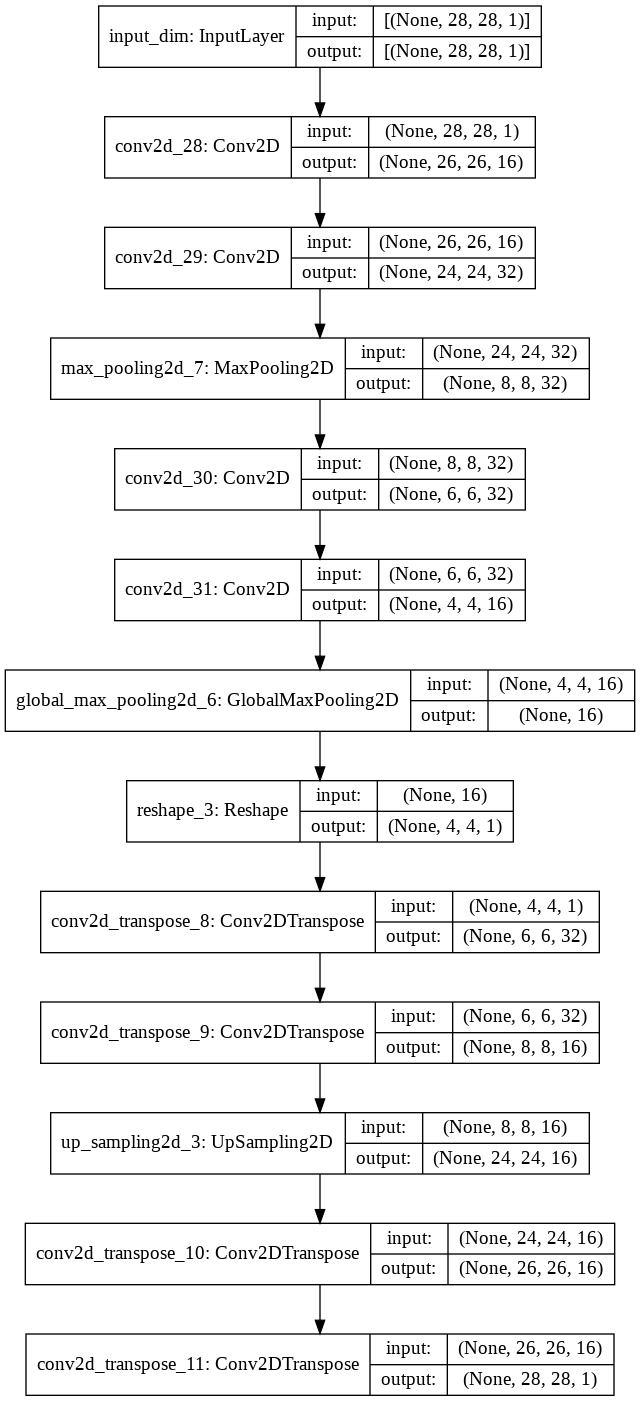

In [ ]:
#A simple encoder decoder model"
encoder_inputs = tf.keras.Input(shape = (28,28,1), name = 'input_dim')
x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'valid',activation = 'relu')(encoder_inputs)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
x = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3),padding = 'valid', activation = 'relu')(x)
encoder_outputs = tf.keras.layers.GlobalMaxPooling2D()(x)
model = tf.keras.Model(inputs = encoder_inputs, outputs = encoder_outputs, name = 'Encoder')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'encode.png', show_shapes = True)
#Deconvolution nets to reconstruct the data
x = tf.keras.layers.Reshape((4,4,1))(encoder_outputs)
x = tf.keras.layers.Convolution2DTranspose(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
x = tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
x = tf.keras.layers.UpSampling2D(3)(x)
x = tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
decoder_outputs = tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
model = tf.keras.Model(inputs = encoder_inputs, outputs = decoder_outputs, name = 'autoencode')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'auto_encoder.png', show_shapes = True)


In [ ]:
#Calling a model inside another model as a layer
#Here we will utilize both weights and model's architecture

In [ ]:
import tensorflow as tf
from tensorflow import keras

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_dim (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 4, 4, 16)          9232      
_________________________________________________________________
global_max_pooling2d_10 (Glo (None, 16)              

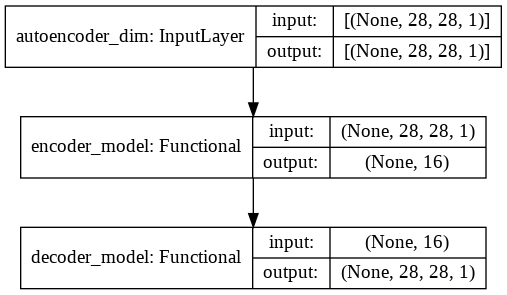

In [ ]:
enc_inputs = keras.Input(shape = (28,28,1), name = 'encoder_dim')
x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'valid')(enc_inputs)
x = keras.layers.Conv2D(filters = 32,kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
x = keras.layers.MaxPooling2D(pool_size = 3)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'valid')(x)
x = keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
enc_outputs = keras.layers.GlobalMaxPooling2D()(x)
encoder_model = keras.Model(inputs = enc_inputs, outputs = enc_outputs, name = 'encoder_model')
encoder_model.summary()
decoder_inputs = keras.Input(shape = (16, ), name = 'decoder_dim')
x = keras.layers.Reshape((4,4,1))(decoder_inputs)
x = keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
x = keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
x = keras.layers.UpSampling2D(3)(x)
x = keras.layers.Conv2DTranspose(filters = 32,kernel_size = (3,3),padding = 'valid', activation = 'relu')(x)
decoder_outputs = keras.layers.Conv2DTranspose(filters = 1, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
decoder_model = keras.Model(inputs = decoder_inputs, outputs = decoder_outputs, name = 'decoder_model')
decoder_model.summary()
autoencoder_inputs = keras.Input(shape = (28,28,1), name = 'autoencoder_dim')
encoded_img = encoder_model(autoencoder_inputs)
decoded_img = decoder_model(encoded_img)
autoencoder_model = keras.Model(inputs = autoencoder_inputs, outputs = decoded_img, name = 'autoencoder_model')
autoencoder_model.summary()
keras.utils.plot_model(model = autoencoder_model, to_file = 'autoencoder_model.png', show_shapes = True)



In [ ]:
#Ensemble models(Averaging the predictions of several models)

In [ ]:
import tensorflow as tf
from tensorflow import keras

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ensemble_input_dim (InputLayer) [(None, 225, 225, 3) 0                                            
__________________________________________________________________________________________________
model_5 (Functional)            (None, 100)          82564       ensemble_input_dim[0][0]         
__________________________________________________________________________________________________
model_6 (Functional)            (None, 100)          82564       ensemble_input_dim[0][0]         
__________________________________________________________________________________________________
model_7 (Functional)            (None, 100)          82564       ensemble_input_dim[0][0]         
____________________________________________________________________________________________

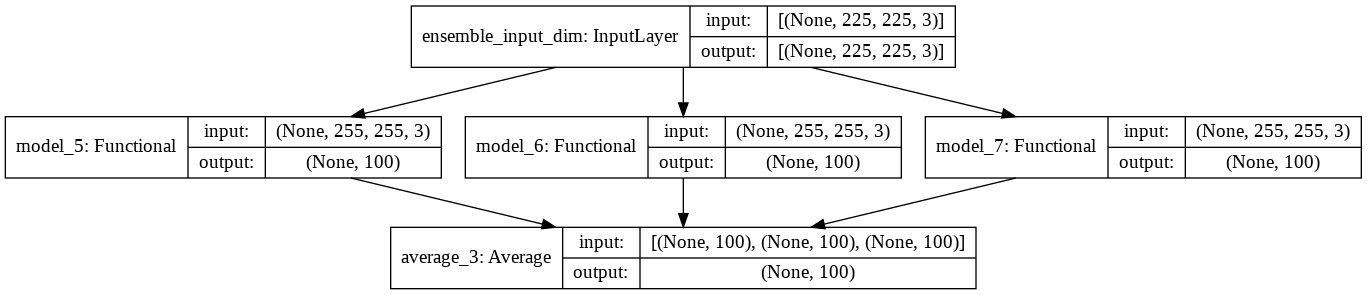

In [ ]:
def ensemble():
  inputs = keras.Input(shape = (255,255,3), name = 'input_dim')
  x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation = 'relu')(inputs)
  x = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size = 3)(x)
  x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'valid', activation = 'relu')(x)
  x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.GlobalMaxPooling2D()(x)
  x = keras.layers.Flatten()(x)
  outputs = keras.layers.Dense(units = 100, activation = 'softmax')(x)
  model = keras.Model(inputs = inputs, outputs = outputs)
  return model

model1 = ensemble()
model2 = ensemble()
model3 = ensemble()

ensembel_inputs = keras.Input(shape = (225,225,3), name = 'ensemble_input_dim')
y1 = model1(ensembel_inputs)
y2 = model2(ensembel_inputs)
y3 = model3(ensembel_inputs)

ensemble_outputs = keras.layers.average([y1,y2,y3])
ensemble_model = keras.Model(inputs = ensembel_inputs, outputs = ensemble_outputs)
ensemble_model.summary()
keras.utils.plot_model(model = ensemble_model, to_file = 'Ensembel.png', show_shapes = True)



In [ ]:
#Complex Graph ..Models with multiple inputs, outputs

In [ ]:
#Consider the survival problem which takes in patients info in various forms
#Patient's  exams on continous quantities like body temp, weight, height BP ect
#Image data such mri, ultrasound ect
#Patients exams on categorical quanties like family history, desease history ect


In [ ]:
#We can build a survival model which predict the risks of the disease and the the survival time
#Asume there are multiple risks (5)
#survival time will be continous

Model: "complex_Surv"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
images (InputLayer)             [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 127, 127, 128 3584        images[0][0]                     
__________________________________________________________________________________________________
continous_features (InputLayer) [(None, 100)]        0                                            
__________________________________________________________________________________________________
categorical_features (InputLaye [(None, 30)]         0                                            
_______________________________________________________________________________________

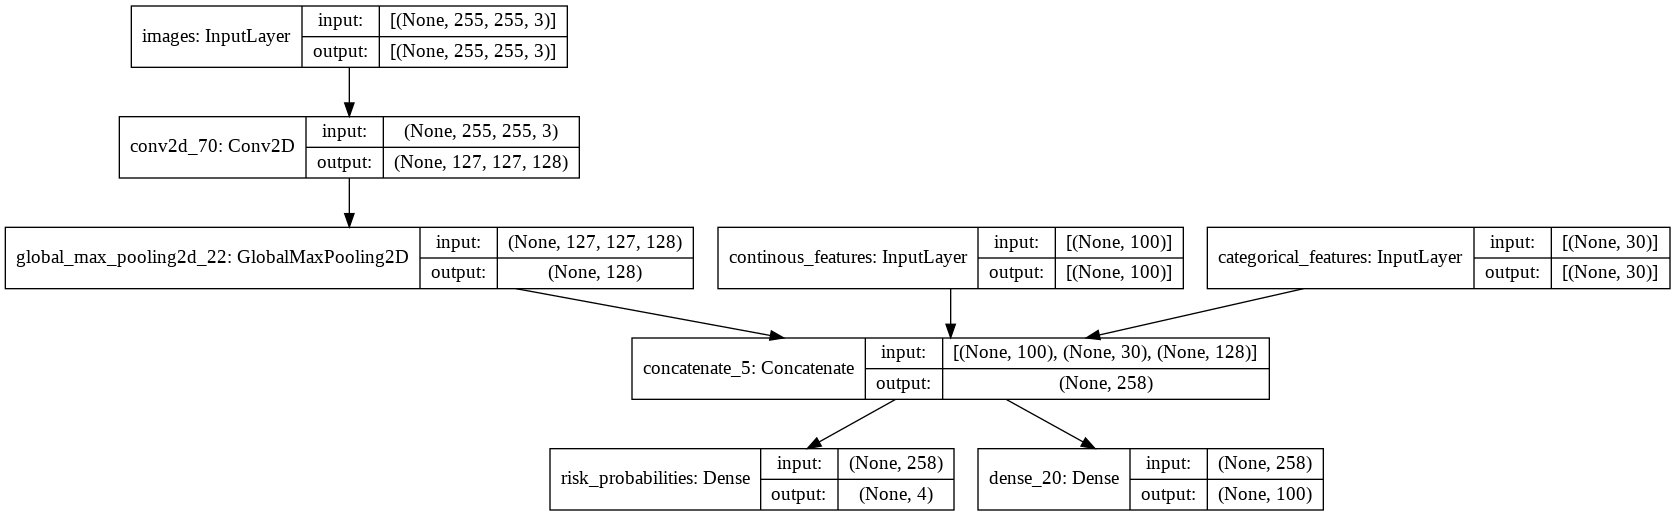

In [ ]:
#The simple model will be like as follws:
Continous_char = keras.Input(shape = (100,), name = 'continous_features')
Categorical_char = keras.Input(shape = (30,), name = 'categorical_features')
medical_images = keras.Input(shape = (255,255,3), name = 'images')
#Manipulate the images 
x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'valid', strides = (2,2))(medical_images)
x = keras.layers.GlobalMaxPool2D()(x)
#Merging the inputs
inputs = keras.layers.concatenate([Continous_char,Categorical_char,x])
#Adding the classification task
risks_specific = keras.layers.Dense(units = 4, activation = 'softmax', name = 'risk_probabilities')(inputs)
#Adding survival class(Assuming descrete time survival)
survival_time = keras.layers.Dense(units = 100,activation = 'softmax')(inputs)
#Creating the model
#Concat
model = keras.Model(inputs = [Continous_char, Categorical_char,medical_images], outputs = [risks_specific, survival_time], name = 'complex_Surv') 
model.summary()
keras.utils.plot_model(model = model, to_file = 'complex_surv.png', show_shapes = True)

In [1]:
#Complex graph with none-linear connection such as the residual connection

In [2]:
import tensorflow as tf
from tensorflow import keras


Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_dim (InputLayer)          [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 30, 30, 64)   1792        input_dim[0][0]                  
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 28, 28, 128)  73856       conv2d_31[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 9, 9, 128)    0           conv2d_32[0][0]                  
_____________________________________________________________________________________________

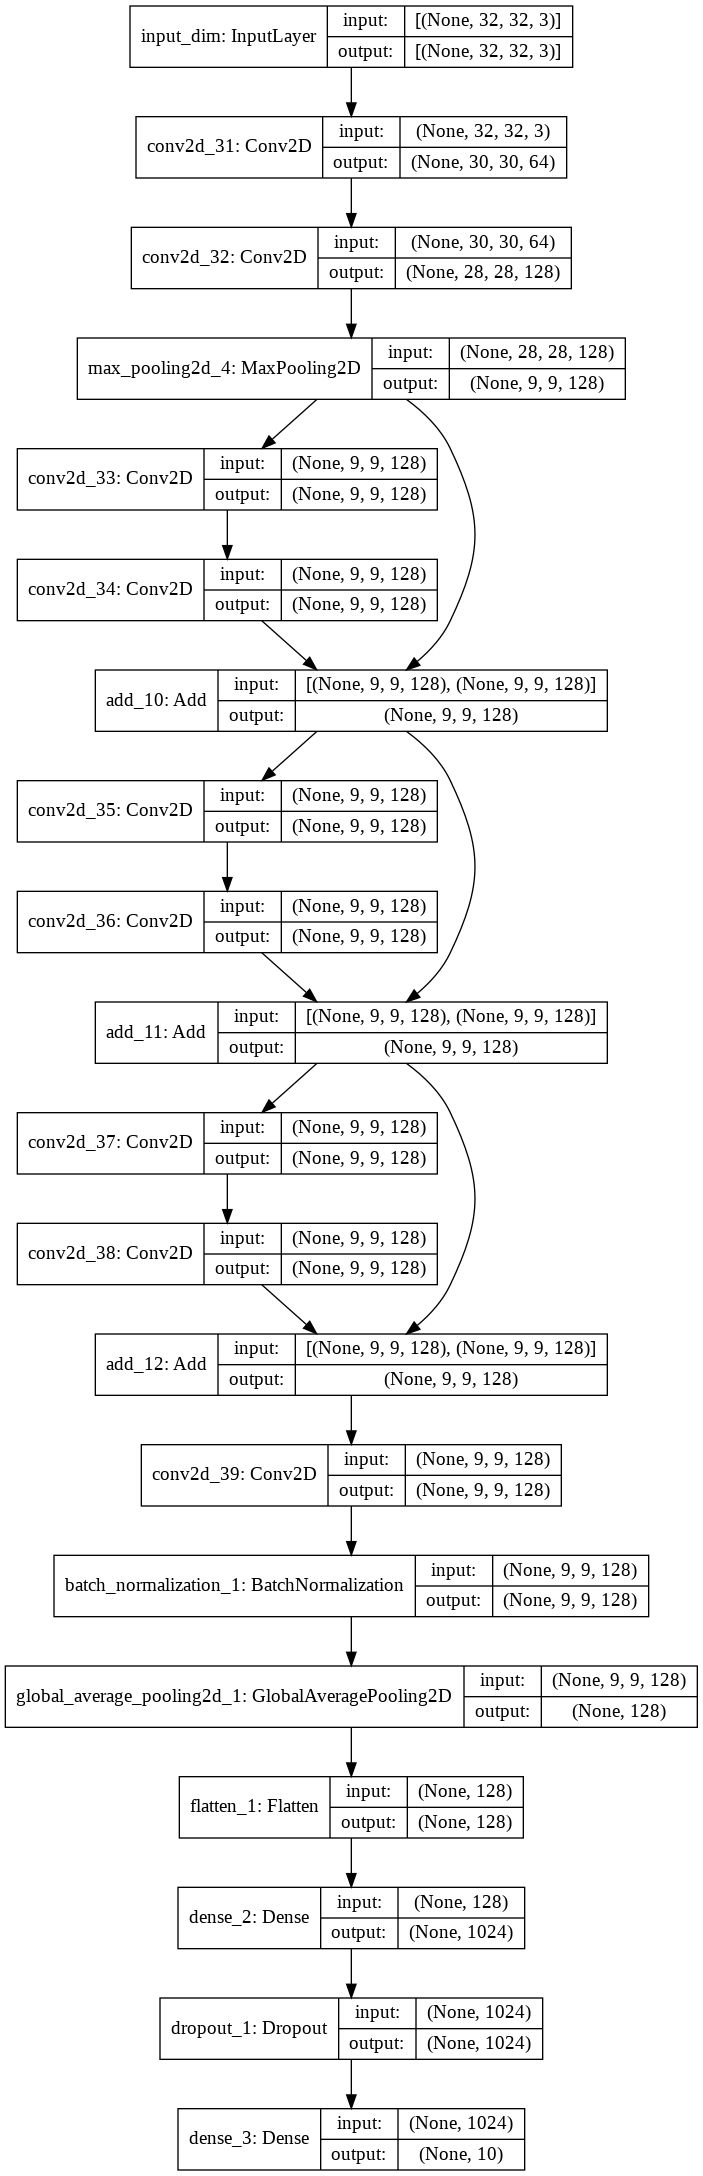

In [7]:
inputs = keras.Input(shape = (32,32,3), name = 'input_dim')
x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu')(inputs)
x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x)
block_1_out = keras.layers.MaxPooling2D(pool_size = 3)(x)

x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', activation = 'relu')(block_1_out)
x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
block_2_out = keras.layers.add([x,block_1_out])

x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu')(block_2_out)
x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', activation = 'relu')(x)
block_3_out = keras.layers.add([x, block_2_out])

x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(block_3_out)
x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
block_4_out = keras.layers.add([x, block_3_out])

x = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(block_4_out)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units = 1024, activation = 'relu')(x)
x = keras.layers.Dropout(rate = 0.5)(x)
outputs = keras.layers.Dense(units = 10, activation = 'softmax')(x)

model = keras.Model(inputs = inputs, outputs = outputs, name = 'ResNet')

model.summary()
keras.utils.plot_model(model = model, to_file = 'resnet.png', show_shapes = True)
